# Projection

One of the fundamental problems surrounding mapping is the mismatch between the 2D nature of paper (and digital) maps and the 3D world we are trying to map. Just like geospatial data filetypes, there exist various map projections. Below are two of the most common map projections in GIS:


- `WGS 84/World Geodetic System, 1984 (EPSG:4326)` 
    represents the world as an ellipsoid, and uses degrees as a unit of measurement. It is commonly used in GPS applications. When you reference something by latitude and longitude, it is projected in `WGS 84`.

- `WGS 84/Pseudo-Mercator (EPSG:3857)`
    is used by popular mapping platforms like OpenStreetMaps, Google, as well as by GIS applications like ArcGIS. It projects ellipsoidal coordinates on a sphere, and uses metres as its unit. Errors of scale and distance exist, up to 0.7 percent and 43 km, respectively {cite}`epsg3857`.


We can check the projection of a `geopandas` dataframe using the following:

In [4]:
# Load the dataframe from the previous section
import geopandas as gpd
# file downloaded from https://data.ontario.ca/dataset/ontario-s-health-region-geographic-data
ontario = gpd.read_file(r"../../data/ontario_health_regions/Ontario_Health_Regions.shp")
ontario.crs


<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Let's reproject the map into `WGS 84`. Let's also filter out Northern Ontario, as we would like to focus more on the southern part of the province.

We can also customize the map to improve readability. Let's add a legend, borders, as well as different colours for each region.

Text(0.5, 1.0, 'WGS84 (lat/lon)')

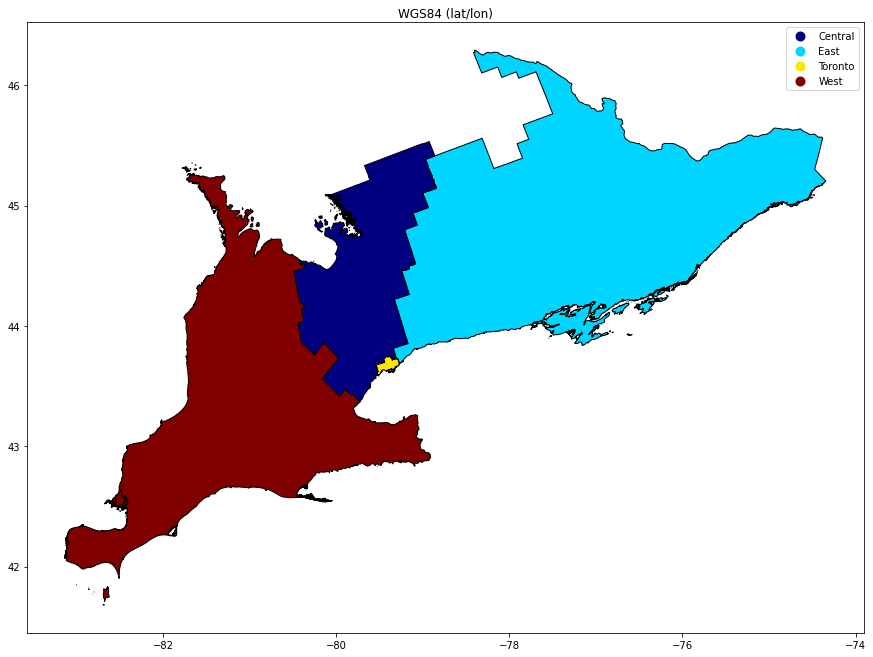

In [5]:
ontario = ontario.to_crs('EPSG:4326')
ontario = ontario[(ontario.REGION != "North")]
ax=ontario.plot(cmap='jet', edgecolor='black', column='REGION', figsize=(15,15), legend=True)
ax.set_title('WGS84 (lat/lon)')

You will notice that the axis markers indicate latitude/longitude, which shows us that we are using `WGS 84`.

Let's add a basemap tile below the polygons. Here, we will opt for OpenStreetMaps as tile provider. Normally, OSM requires `EPSG:3857`, as its [Mapnik](https://wiki.openstreetmap.org/wiki/Mapnik) renderer operates in `Web Mercator` projection. However, we can instead "warp" the incoming map tiles to fit our data by passing our dataframe's CRS into the `add_basemap` method. Below we've shown what the two different projections look like, side-by-side:

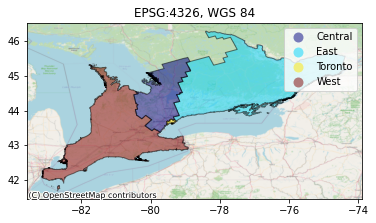

In [7]:
import contextily as ctx

ax=ontario.plot(cmap='jet', edgecolor='black', column='REGION', alpha=0.5, legend=True)
ax.set_title("EPSG:4326, WGS 84")
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=ontario.crs.to_string())

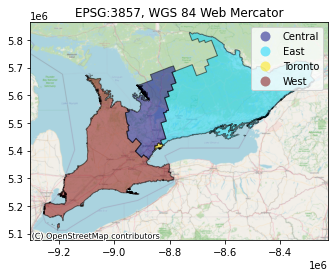

In [8]:
ontario = ontario.to_crs(epsg=3857) 
ax2=ontario.plot(cmap='jet', edgecolor='black', column='REGION', alpha=0.5, legend=True)
ax2.set_title("EPSG:3857, WGS 84 Web Mercator")
ctx.add_basemap(ax2, source=ctx.providers.OpenStreetMap.Mapnik)